In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h1>About the Data</h1> <br>
<ul>
<li>UTC: Time Stamp</li>
<li>Temperature: Air Temperature</li>
<li>Humidity%: Air Humidity</li>
<li>TVOC[ppb]: Total Volatile Organic Compounds; measured in parts per billion</li>
<li>eCO2[ppm]: co2 equivalent concentration; calculated from different values like TVCO</li>
<li>Raw H2: raw molecular hydrogen; not compensated (Bias, temperature, etc.)</li>
<li>Raw Ethanol: raw ethanol gas</li>
<li>Pressure[hPa]: Air Pressure</li>
<li>PM1.0: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)</li>
<li>PM2.5: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)</li>
<li>NC0.5: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air</li>
<li>NC1.0: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air</li>
<li>Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air</li>
<li>CNT: Sample counter.</li>
<li>Fire Alarm: Ground truth is "1" if a fire is there.</li>
</ul>

In [3]:
df = pd.read_csv('./smoke_detection_iot.csv', index_col= 0)

In [4]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


In [6]:
df.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [7]:
df['UTC'] = pd.to_datetime(df['UTC'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   UTC             62630 non-null  datetime64[ns]
 1   Temperature[C]  62630 non-null  float64       
 2   Humidity[%]     62630 non-null  float64       
 3   TVOC[ppb]       62630 non-null  int64         
 4   eCO2[ppm]       62630 non-null  int64         
 5   Raw H2          62630 non-null  int64         
 6   Raw Ethanol     62630 non-null  int64         
 7   Pressure[hPa]   62630 non-null  float64       
 8   PM1.0           62630 non-null  float64       
 9   PM2.5           62630 non-null  float64       
 10  NC0.5           62630 non-null  float64       
 11  NC1.0           62630 non-null  float64       
 12  NC2.5           62630 non-null  float64       
 13  CNT             62630 non-null  int64         
 14  Fire Alarm      62630 non-null  int64         
dtypes:

In [9]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1970-01-01 00:00:01.654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1970-01-01 00:00:01.654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1970-01-01 00:00:01.654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1970-01-01 00:00:01.654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1970-01-01 00:00:01.654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [10]:
df.tail()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,1970-01-01 00:00:01.655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1970-01-01 00:00:01.655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1970-01-01 00:00:01.655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1970-01-01 00:00:01.655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,1970-01-01 00:00:01.655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


## Drop UTC and CNT as they are of no use

In [11]:
df.drop(columns=['UTC', 'CNT'], inplace= True)

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

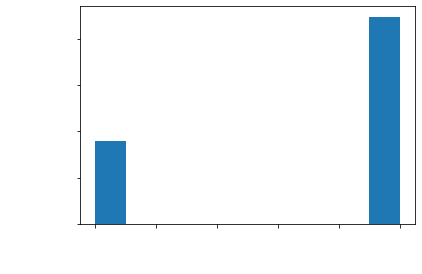

In [29]:
# sns.histplot(df['Fire Alarm'])
plt.hist(df['Fire Alarm'])
plt.xlabel('Fire Alarm', color= 'white', fontsize = 18, weight = 'bold')
plt.ylabel('Count', color= 'white', fontsize = 18, weight = 'bold')
plt.xticks(color = 'white', fontsize = 14)
plt.yticks(color = 'white', fontsize = 14)

([<matplotlib.patches.Wedge at 0x2ab1ee7a830>,
 [Text(-0.6867566913298193, 0.8592818204254757, 'Yes'),
  Text(0.6867567717815868, -0.8592817561266699, 'No')])

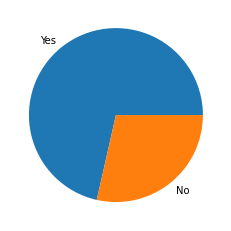

In [42]:
x = df['Fire Alarm'].value_counts()
plt.pie(x, labels=['Yes', 'No'])

## Temperature affect on Fire

In [13]:
temperature_fire = df.groupby('Temperature[C]')[['Fire Alarm']].count().sort_values(by='Fire Alarm',ascending = False).head(20)
temperature_fire

,Fire Alarm
Temperature[C],
24.48,222
24.51,206
24.47,193
26.95,191
26.98,189
27.02,187
24.45,186
24.52,183
24.55,182


c:\Users\hmagdy.ITECHS-EG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperature affect on Fire')

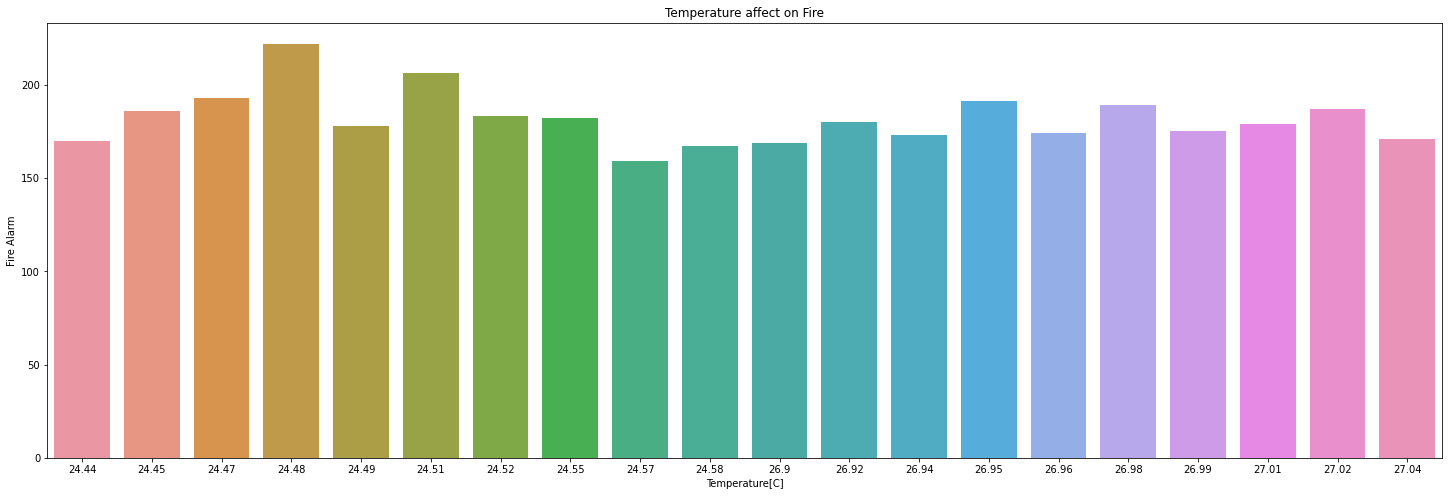

In [14]:
plt.figure(figsize=[25,8])
sns.barplot(temperature_fire.index,temperature_fire['Fire Alarm'])
plt.title('Temperature affect on Fire')

### This graph shows that high temperatures don't have a direct affect on fires

## Humidity affect on fires

In [15]:
humidity_fire = df.groupby('Humidity[%]')[['Fire Alarm']].count().sort_values(by='Fire Alarm',ascending = False).head(20)
humidity_fire

,Fire Alarm
Humidity[%],
47.45,130
47.50,130
47.86,126
53.12,126
47.76,126
47.66,124
53.35,124
47.62,123
47.70,122


c:\Users\hmagdy.ITECHS-EG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Humidity affect on Fire')

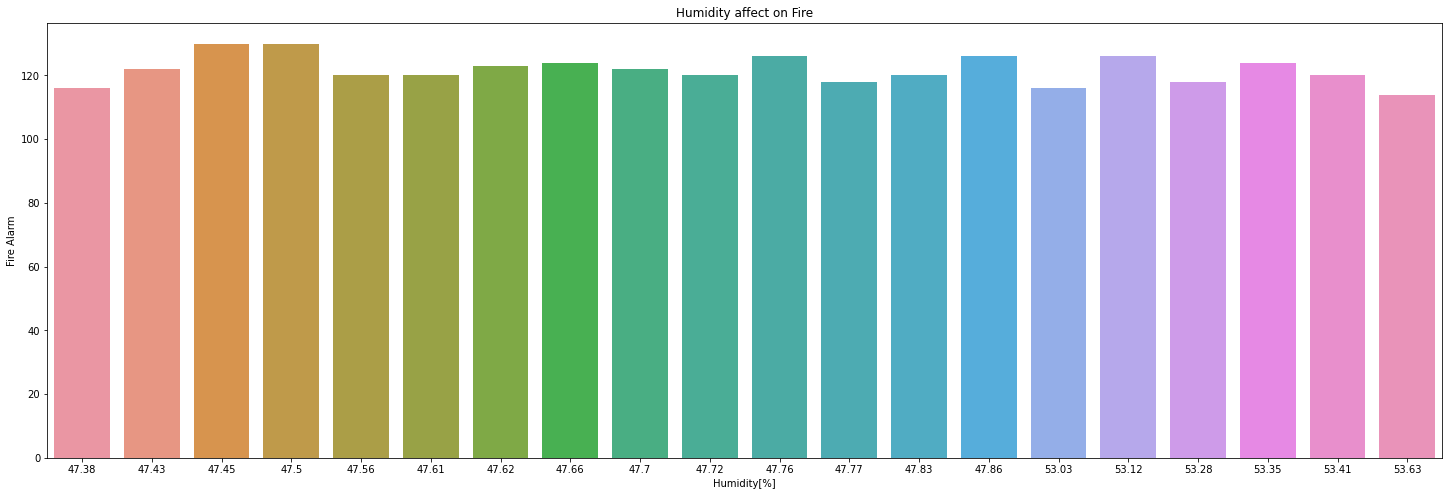

In [16]:
plt.figure(figsize=[25,8])
sns.barplot(humidity_fire.index,humidity_fire['Fire Alarm'])
plt.title('Humidity affect on Fire')

### This graph shows that high humidity doesn't have a direct affect on fires

## Pressure affect on fires

In [17]:
pressure_fire = df.groupby('Pressure[hPa]')[['Fire Alarm']].count().sort_values(by='Fire Alarm',ascending = False).head(20)
pressure_fire

,Fire Alarm
Pressure[hPa],
938.709,304
938.706,284
938.716,278
938.711,266
938.710,266
938.713,262
938.703,260
938.720,256
938.717,252


c:\Users\hmagdy.ITECHS-EG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pressure affect on Fire')

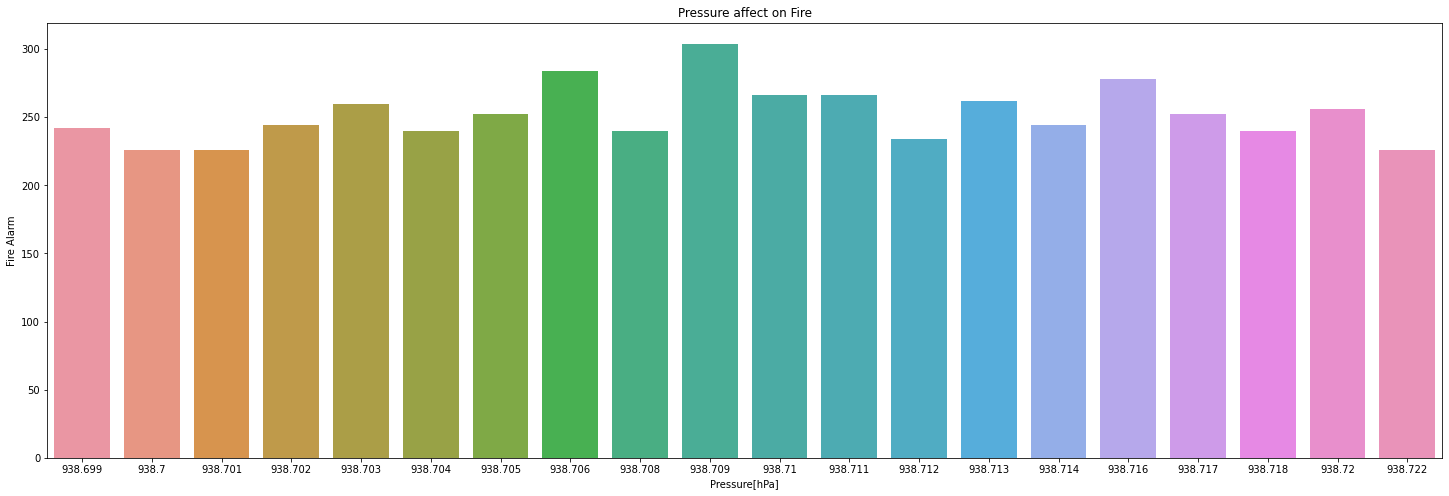

In [18]:
plt.figure(figsize=[25,8])
sns.barplot(pressure_fire.index,pressure_fire['Fire Alarm'])
plt.title('Pressure affect on Fire')

## Raw Ethanol affect on fires

In [19]:
ethanol_fire = df.groupby('Raw Ethanol')[['Fire Alarm']].count().sort_values(by='Fire Alarm',ascending = False).head(20)
ethanol_fire

,Fire Alarm
Raw Ethanol,
19438,685
19443,504
19448,494
19446,486
19442,479
19450,464
19441,462
19445,459
19447,458


c:\Users\hmagdy.ITECHS-EG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Raw Ethanol affect on Fire')

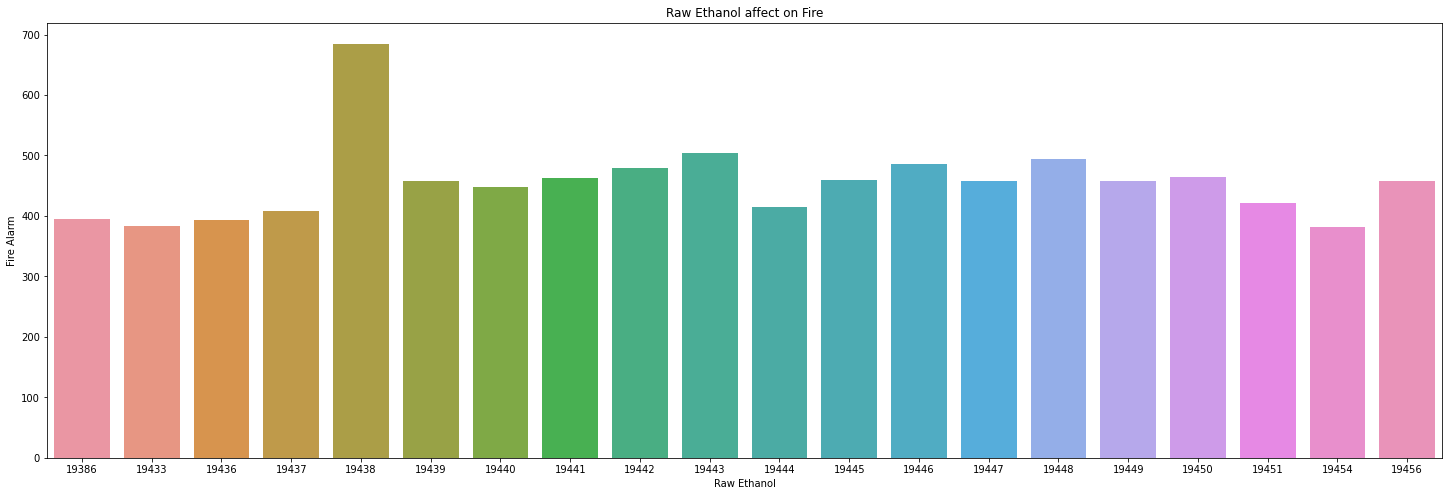

In [20]:
plt.figure(figsize=[25,8])
sns.barplot(ethanol_fire.index,ethanol_fire['Fire Alarm'])
plt.title('Raw Ethanol affect on Fire')

### It seems that fires are higher when the Raw Ethanol value is 19438

## Correlation between the Parameters

<AxesSubplot:>

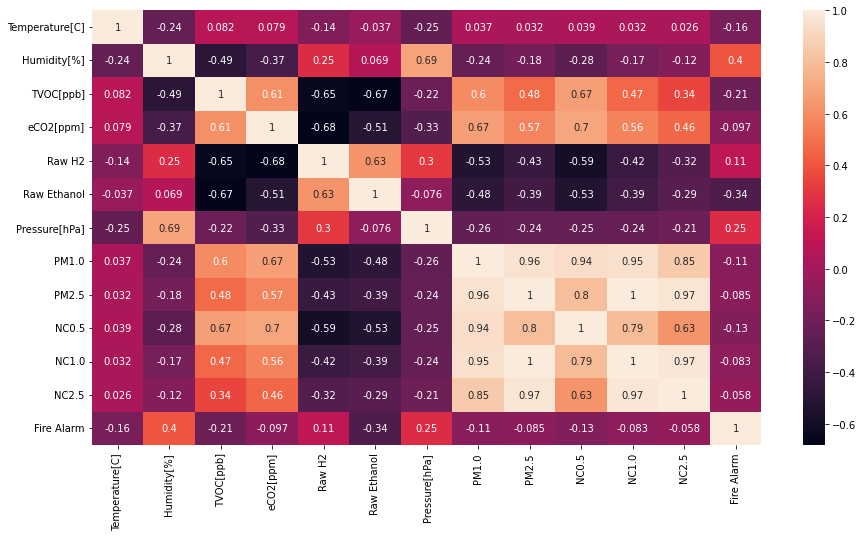

In [21]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(),annot = True)

## Detect Outliers

<AxesSubplot:>

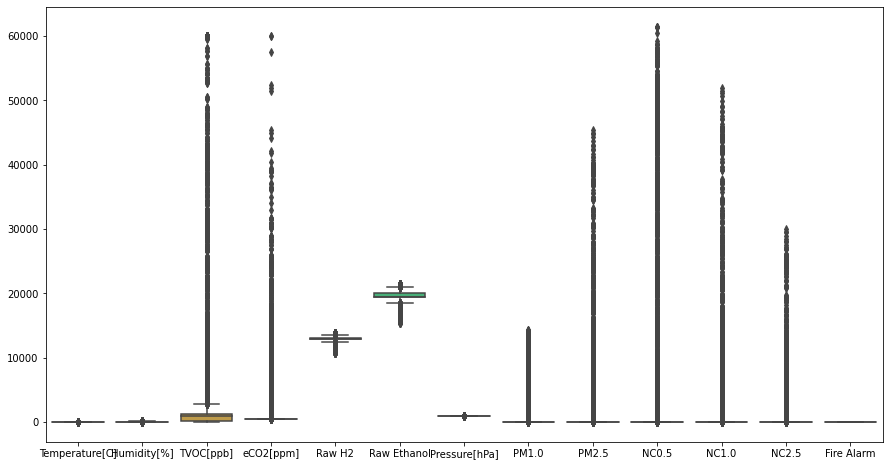

In [ ]:
plt.figure(figsize=[15,8])
sns.boxplot(data=df)

## Handle Outliers

In [ ]:
from datasist.structdata import detect_outliers
index = detect_outliers(df,0,['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5'])
len(index)

17492

In [ ]:
for col in df[['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]:
    outliers_indices = detect_outliers(df, 0, [col])
    col_median = df[col].median()
    df[col].iloc[outliers_indices] = col_median

C:\Users\hmagdy.ITECHS-EG\AppData\Local\Temp\ipykernel_2840\2729013575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[outliers_indices] = col_median
C:\Users\hmagdy.ITECHS-EG\AppData\Local\Temp\ipykernel_2840\2729013575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[outliers_indices] = col_median
C:\Users\hmagdy.ITECHS-EG\AppData\Local\Temp\ipykernel_2840\2729013575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

<AxesSubplot:>

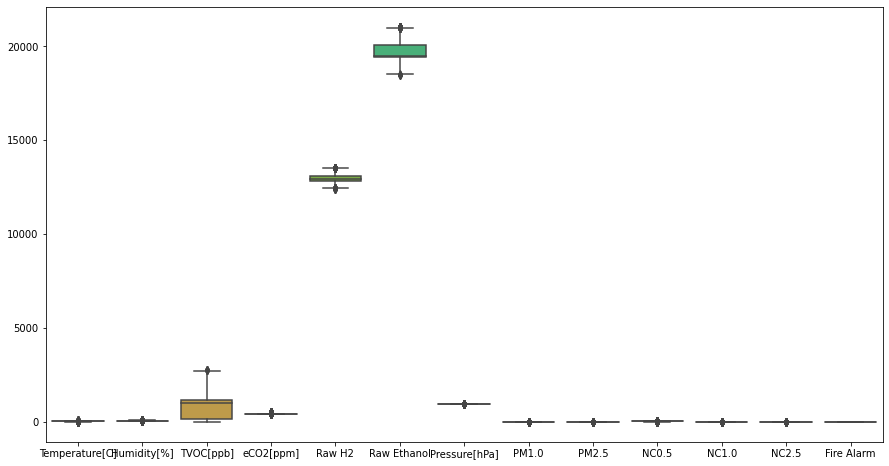

In [ ]:
plt.figure(figsize=[15,8])
sns.boxplot(data=df)

## Split input data and output data

In [ ]:
X = df.drop(columns='Fire Alarm')
y = df['Fire Alarm']

## Split data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 18, stratify= y)

In [ ]:
y_train.value_counts()

1    35806
0    14298
Name: Fire Alarm, dtype: int64

In [ ]:
y_test.value_counts()

1    8951
0    3575
Name: Fire Alarm, dtype: int64

In [ ]:
x_train.duplicated().sum()

7

## Handle Imbalance using SMOTE Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
y_train_smote.value_counts()

0    35806
1    35806
Name: Fire Alarm, dtype: int64

In [ ]:
x_train_smote.duplicated().sum()

11

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

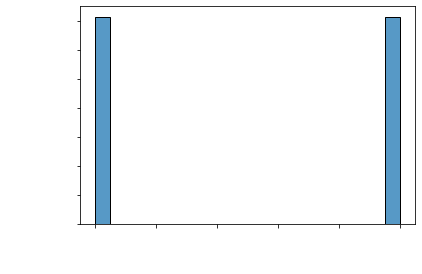

In [ ]:
sns.histplot(y_train_smote)
plt.xlabel('Fire Alarm', color= 'white', fontsize = 18, weight = 'bold')
plt.ylabel('Count', color= 'white', fontsize = 18, weight = 'bold')
plt.xticks(color = 'white', fontsize = 14)
plt.yticks(color = 'white', fontsize = 14)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = scaler.get_feature_names_out())
x_train_scaled

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,-0.169593,0.924613,-1.313453,-0.433703,-1.339233,-0.007796,0.918066,-2.164899,-2.080947,-2.205206,-2.072495,0.923316
1,0.288894,0.632436,-1.246229,-0.433703,1.792994,0.933854,0.781683,1.357997,1.360786,1.364582,1.363897,1.408004
2,0.593857,0.313454,0.714476,-0.433703,-0.995892,-0.724916,0.343311,0.975074,0.978371,0.977874,0.977641,0.992557
3,0.423662,1.270400,-0.775660,-0.433703,1.034031,0.340454,0.793673,-0.571938,-0.580704,-0.586843,-0.577358,-0.738470
4,0.161977,-0.892782,0.828383,-0.433703,-0.658576,-0.734080,0.212923,0.653418,0.640081,0.644813,0.646972,0.646352
...,...,...,...,...,...,...,...,...,...,...,...,...
50099,0.583437,0.978223,1.282147,0.831269,0.004011,-0.894459,0.079538,0.622784,0.625373,0.615753,0.618466,0.577111
50100,0.310290,-0.555036,0.897475,0.072286,-0.248977,-0.773029,0.051811,-0.143063,-0.139456,-0.142016,-0.134091,-0.253782
50101,-0.029268,0.844197,-1.251831,-0.433703,0.744903,0.461883,0.805663,-1.582856,-1.580866,-1.597202,-1.582192,-1.846327
50102,0.277918,-0.069861,0.518405,-0.433703,-1.622338,-2.021689,-1.303772,-1.613489,-1.595574,-1.619556,-1.602147,-1.846327


In [ ]:
x_test_scaled = pd.DataFrame(x_test_scaled,columns = scaler.get_feature_names_out())
x_test_scaled

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,-0.069212,-0.874018,-1.147260,-0.433703,1.383395,0.713906,0.752459,-0.740424,-0.742495,-0.754491,-0.742692,-0.876952
1,0.748770,-0.496064,0.729415,1.527004,-0.526058,-0.718043,0.144731,0.193910,0.198834,0.197751,0.203705,0.161664
2,0.765443,-0.662257,0.886271,0.072286,-0.176695,-0.770738,0.091527,-0.005211,-0.007082,-0.016839,-0.010090,-0.115300
3,0.258745,0.509132,-1.296647,-0.433703,1.546030,0.892613,0.737471,-0.694473,-0.683662,-0.694138,-0.684255,-0.876952
4,2.463928,-0.069861,2.083234,-0.433703,-0.212836,0.998005,-1.455891,-0.939544,-0.933702,-0.953433,-0.942234,-1.153916
...,...,...,...,...,...,...,...,...,...,...,...,...
12521,0.138149,-0.592563,-1.266770,-0.433703,1.034031,0.601641,0.740469,-1.169298,-1.169035,-1.183670,-1.170282,-1.361640
12522,0.197405,-0.316469,0.660323,-0.433703,-0.857352,-0.702005,0.310339,0.530882,0.537124,0.530812,0.535799,0.507870
12523,-1.436614,-0.069861,0.027296,-0.433703,-1.411515,-0.516424,0.389771,1.235462,1.228412,1.228228,1.228493,1.269522
12524,0.229777,-0.555036,0.890006,-0.117460,-0.303188,-0.770738,0.051811,0.301128,0.301791,0.293869,0.299200,0.230905
